# Traslado de manantiales/sumideros
Para la aplicación de la **Regla del Área** a cuerpos no esbeltos o axilsimétricos (Método de Hayes), se realiza un promediado de las resistencias de onda calculadas para cuerpos esbeltos equivalentes obtenidos para distintos planos meridianos de un volumen de contro.
El cálculo de cuerpos esbeltos equivalentes precisa de la traslación de las singularidades que definen el cuerpo (distribuidas en el espacio) al eje principal del cuerpo, **sin cambiar su intensidad**, ni su efecto sobre la superficie que define el volumen de control. Es decir, esta traslación se realiza bajo la premisa de que dichas singularidades produzcan la misma perturbación en el campo lejano. En este documento se describen las envolventes a través de las cuales se puede desplazar una singularidad en el espacio para mantener dicha contribución. Por simplicidad, y al tratarse de superficies cónicas, se realizan representaciones gráficas en dos dimensiones, cuya extensión a tres dimensiones es intuitita. Por último, de aquí en adelante se habla de manantiales, entendiéndose que de igual modo se podría hablar de sumideros. 

Este documento se puede consultar en formato PDF, como Notebook de Python descargable, o como Notebook interactivo a través de Binder [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/AMartinezCava/pyAero/main?labpath=0.ENVOLVENTES_SINGULARIDADES%2FDistancia_Hiperbolica.ipynb).

Como referencias para el estudio del Método de Hayes, además de los apuntes de clase se recomienda consultar:
1. A. Barrero Ripoll, J. Meseguer Ruiz, A. Sanz Andrés, *Aerodinámica de Altas Velocidades*, Grupo Editorial Garceta, 2011
2. Holt Ashley, Mårten Landahl, Marten T. Landahl, *Aerodynamics of Wings and Bodies*, Dover Books on Aeronautical Engineering, 1965

### Contribución de un manantial aislado en régimen incompresible
En flujo incompresible, la contribución diferencial de un manantial situado en el origen a un punto $P$ cualquiera del plano de estudio es:
$$\begin{equation}
\mathrm{d}\varphi_{INC} = -\frac{\mathrm{d}Q}{4\pi \sqrt{(x_P-x)^2+r^2}},
\end{equation}$$
con $r^2=(y_P-y)^2 + (z_P-z)^2$, recibiéndose la misma contribución diferencial de aquellos manantiales situados en la envolvente circular centrada en el punto de estudio.

En la Figura siguiente, se representa con un cuadrado rojo el punto $P$ de estudio, y con puntos negros aquellos que definen la envolvente en la que las singularidades proporcionarían una contribución diferencial equivalente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


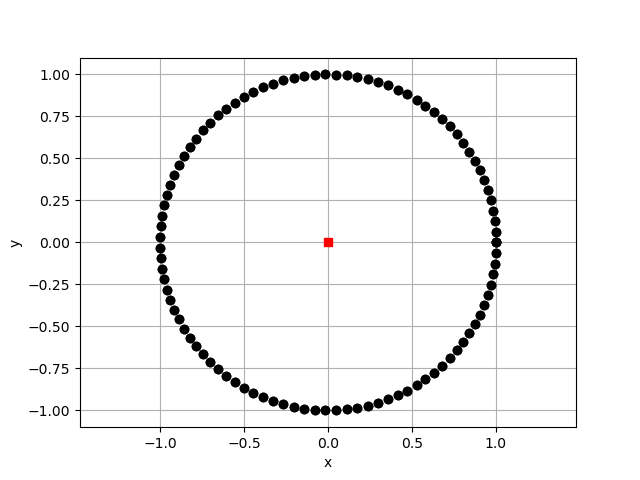

In [2]:
R = 1                                      # Distancia del punto de estudio al manantial de origen
theta = np.linspace(0, 2 * np.pi, 100)     # Por simplicidad geométrica, barremos en ángulo el espaco a cubrir
x = R * np.cos(theta)
y_pos = np.sqrt(R**2-x**2)
y_neg = -np.sqrt(R**2-x**2)

fig, ax = plt.subplots()
ax.plot(x, y_pos, 'ko')                    # Se pinta la envolvente circular para valores positivos y negativos de Y
ax.plot(x, y_neg, 'ko')
ax.plot(0, 0, 'rs')                        # Representamos gráficamente el punto P, como un punto rojo en el origen
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.axis('equal')
ax.grid(True)

### Contribución de un manantial aislado en régimen compresible subsónico
La extensión de esta solución a flujo compresible, para por la introducción de las coordenadas dilatadas
$$\begin{equation}
\bar{y} = \beta y, \bar{z} = \beta z,
\end{equation}$$
siendo $\beta=\sqrt{1-\mathrm{M}_{\infty}^2}$, que transforma la ecuación de Laplace según el número de Mach de la corriente incidente, $\mathrm{M}_{\infty}$.

La contribución diferencial de un manantial situado en el origen a un punto $P$ cualquiera del plano de estudio es entonces:
$$\begin{equation}
\mathrm{d}\varphi_{SUB} = -\frac{\mathrm{d}Q}{4\pi \sqrt{(x_P-x)^2 + \beta r^2}},
\end{equation}$$
recibiéndose la misma contribución diferencial de aquellos manantiales situados en la envolvente elíptica centrada en el punto $P$ (que corresponde a un círculo en coordenadas dilatadas).

Del mismo modo que la sección anterior, la siguiente Figuras representa el punto $P$ de estudio (cuadrado rojo), y la envolvente en la que las singularidades proporcionarían una contribución diferencial equivalente (puntos negros).

<IPython.core.display.Javascript object>


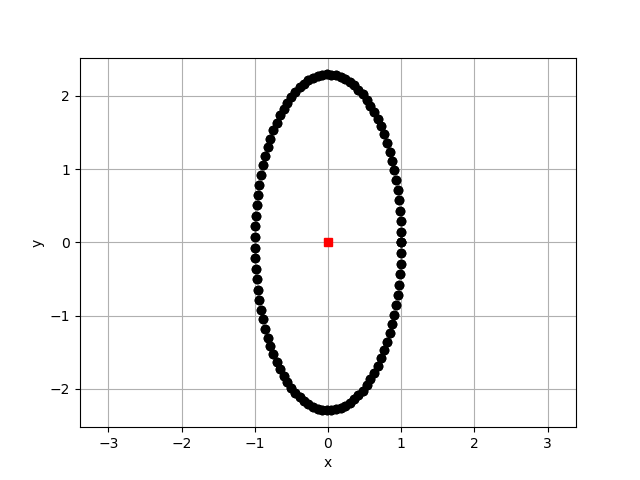

In [3]:
M = 0.9                                      # Número de Mach
B = (1-M**2)**0.5                            # Coeficiente de dilatación \beta


R = 1                                        # Distancia del punto de estudio al manantial de origen
theta = np.linspace(0, 2 * np.pi, 100)       # Por simplicidad geométrica, barremos en ángulo el espaco a cubrir
x = R * np.cos(theta)
y_pos = np.sqrt(R**2-x**2)/B
y_neg = -np.sqrt(R**2-x**2)/B

fig, ax = plt.subplots()
ax.plot(x, y_pos, 'ko')
ax.plot(x, y_neg, 'ko')
ax.plot(0, 0, 'rs')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.axis('equal')
ax.grid(True)

### Contribución de un manantial aislado en régimen compresible supersónico
En flujo supersónico, las perturbaciones de un manantial situado en el origen solo pueden alcanzar los puntos situados en el interior del cono de Mach definido por
$$\begin{equation}
\beta^2(y^2+z^2)-x^2=0,
\end{equation}$$
para valores de $x>0$.
Del mismo modo, el punto de estudio, $P$, solo recibirá contribuciones de aquellos manantiales situados dentro del cono de escucha definido por la expresión
$$\begin{equation}
\beta^2[(y_P-y)^2 + (z_P-z)^2] - (x_P-x)^2=0,
\end{equation}$$
para valores de $x<x_P$. Sirva de complemento al recordatorio la siguiente imagen:
![ejemplo](https://short.upm.es/j7lgr).

La contribución diferencial de un manantial situado en un punto $1$ a un punto cualquiera $P$ del plano de estudio es entonces:
$$\begin{equation}
\mathrm{d}\varphi_{SUP} = -\frac{\mathrm{d}Q}{4\pi \sqrt{(x_P-x_1)^2 - \beta r^2}},
\end{equation}$$
con $r^2=(y_P-y_1)^2 + (z_P-z_1)^2$, quedando los puntos que hacen negativo el radicando fuera del cono de Mach (y por tanto fuera de la influencia del manantial).
Para una misma intensidad del manantial diferencial, $\mathrm{d}Q$, el punto $P$ percibirá la misma contribución de aquellos manantiales que mantengan el valor del radicando constante. Éstos puntos serán aquellos que estén situados en la envolvente definida por la hipérbola de dos hojas centrada en $P$, manteniéndose constante el radio hiperbólico $\sqrt{(x_P-x_1)^2 - \beta r^2}$.

En la Figura siguiente se dibuja el cono de escucha del punto $P$ (linea contínua azul), junto con la serie de puntos que poseen radio hiperbólico constante (cruces negras). Al desplazar un manantial (cuadrado gris), sin modificar su intensidad, a lo largo de la serie de puntos, se producirá la misma contribución en el punto $P$, teniendo en cuenta que ésta se desarrolla en régimen supersónico. El punto de corte de la hipérbola con el eje $x$, $x_i$ se representa con un círculo verde.
Se puede observar que, si el punto $P$ se aleja lo suficiente del eje $y=0$ (que en estas representaciones bidimensionales equivale al eje de un cuerpo esbelto), el desplazamiento cerca del eje del manantial sucede a través de rectas $(x-x_i) = \beta(y)$ representadas en la figura como líneas discontínuas.

Si se desea, se puede modificar el código para reducir la distancia $y_P$, que equivale al radio del volumen de control desarrollado en las lecciones de teoría.

<IPython.core.display.Javascript object>


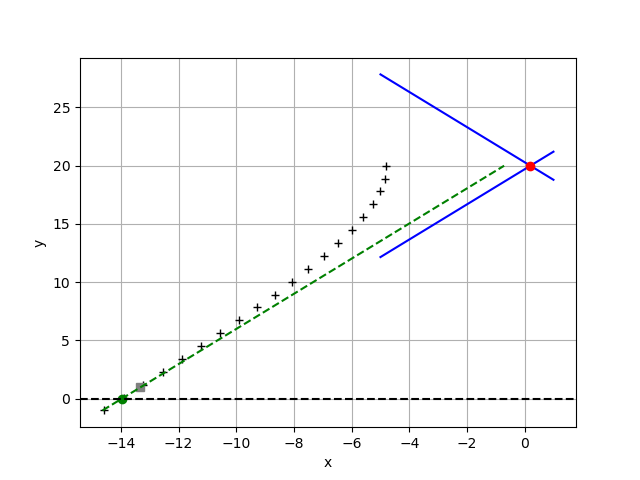

In [4]:
def rh_cte(y, k, xp=0, yp=0):
    """Función que, para una coordenada y dada, devuelve la coordenada x correspondiente a la curva 
       con radio hiperbólico constante, k, para el hiperboiloide centrado en (xp, yp)."""
    return -np.sqrt(B**2*(yp-y)**2 + k**2) + xp

## ------------------------------------------------------------------------------- ##

M = 1.2                        # Número de Mach
B = (M**2-1)**0.5              # Coeficiente de dilatación \beta
xp = 0.2; yp = 20                # Posición del punto de estudio, P
fig, ax = plt.subplots()

## Dibujamos el cono de escucha de el punto P
xc = np.linspace(-5, 1, 100)
yc_pos = (xp-xc)/ B + yp
yc_neg = -(xp-xc)/ B + yp
ax.plot(xc, yc_pos, 'b')
ax.plot(xc, yc_neg, 'b')

# Posicionamos en el gráfico el punto de estudio
ax.plot(xp, yp, 'ro')

# Trazamos la curva con radio hiperbólico constante
k = 5.0                          # Valor constante del radio hipebólico
y = np.linspace(-1,20,20)        # Valores acotados de la coordenada y
x = rh_cte(y, k, xp, yp)         # Cálculo de las coordenadas x de la hipérbola que mantiene constante el radio h.
ax.plot(x, y,'k+')

# Representamos el manantial a desplazar
y_m = 1.0
x_m = rh_cte(y_m, k, xp, yp)
ax.plot(x_m, y_m, color='grey', marker='s')

# Buscamos la posición del punto de corte de la hipérbola con el eje x (punto x_i)
x_corte = rh_cte(0.0, k, xp, yp)
ax.plot(x_corte, 0, 'go')

# Pintamos la recta tangente al cono de Mach sobre la cual desplazamos los manantiales
x_l = y*B + x_corte
ax.plot(x_l,y, 'g--')

# ax.set_xlim(-2,2)
# ax.set_ylim(-1,11)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axhline(0, color='k', linestyle='--')
# ax.axis('equal')
ax.grid(True)

Como complemento, se dibuja a continuación el hiperboloide de revolución (sólamente la hoja correspondiente al cono de escucha) bajo el cual se podrían desplazar manantiales de igual intensidad, y mantener la contribución diferencial constante en el punto $P$.

<IPython.core.display.Javascript object>


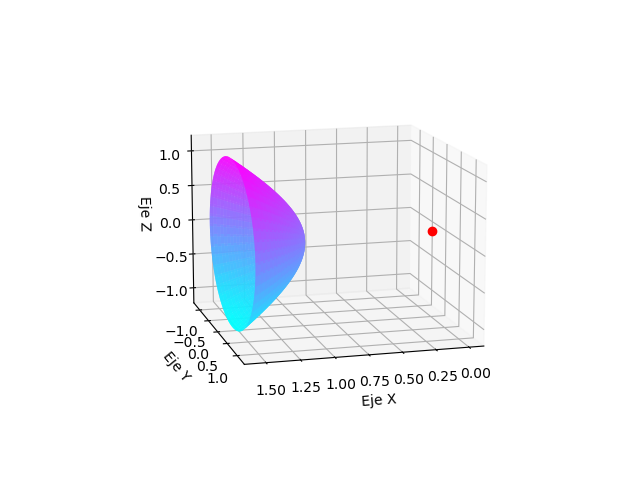

In [5]:
# Parámetros de la hipérbola con radio hiperbólico constante
h = 1  # Radio hiperbólico constante

# Coordenadas para la hipérbola
u_h = np.linspace(0, 2 * np.pi, 100)
v_h = np.linspace(-1, 1, 100)
U_h, V_h = np.meshgrid(u_h, v_h)
Z_h = h * np.sinh(V_h) * np.cos(U_h)
Y_h = h * np.sinh(V_h) * np.sin(U_h)
X_h = h * np.cosh(V_h)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la hipérbola con radio hiperbólico constante
ax.plot_surface(X_h, Y_h, Z_h, cmap='cool', alpha=0.8)
ax.plot(0,0,0, 'ro')

# Configurar etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Habilitar la interactividad para rotar la imagen con el ratón
ax.view_init(elev=20, azim=80)  # Puedes ajustar los ángulos elevación y azimut